## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
print("app_train.shape: ", app_train.shape)
app_train.loc[app_train["AMT_INCOME_TOTAL"].isna(), ["AMT_INCOME_TOTAL"]]

app_train.shape:  (307511, 244)


,AMT_INCOME_TOTAL


### 等頻劃分 AMT_INCOME_TOTAL

In [39]:
app_train["AMT_INCOME_TOTAL_QCUT"] = pd.qcut(app_train["AMT_INCOME_TOTAL"], q=7) #???
app_train["AMT_INCOME_TOTAL_QCUT"].value_counts()

(25649.999, 90000.0]       57922
(157500.0, 202500.0]       52918
(112500.0, 135000.0]       48849
(90000.0, 112500.0]        42656
(247500.0, 117000000.0]    39797
(135000.0, 157500.0]       33628
(202500.0, 247500.0]       31741
Name: AMT_INCOME_TOTAL_QCUT, dtype: int64

## Plot bins

In [41]:
bin_series = app_train["AMT_INCOME_TOTAL_QCUT"].unique()
print("bin_series = ", bin_series)

bin_series =  [(157500.0, 202500.0], (247500.0, 117000000.0], (25649.999, 90000.0], (112500.0, 135000.0], (90000.0, 112500.0], (202500.0, 247500.0], (135000.0, 157500.0]]
Categories (7, interval[float64]): [(25649.999, 90000.0] < (90000.0, 112500.0] < (112500.0, 135000.0] < (135000.0, 157500.0] < (157500.0, 202500.0] < (202500.0, 247500.0] < (247500.0, 117000000.0]]


In [42]:
app_train["AMT_INCOME_TOTAL_QCUT"].head()

0       (157500.0, 202500.0]
1    (247500.0, 117000000.0]
2       (25649.999, 90000.0]
3       (112500.0, 135000.0]
4       (112500.0, 135000.0]
Name: AMT_INCOME_TOTAL_QCUT, dtype: category
Categories (7, interval[float64]): [(25649.999, 90000.0] < (90000.0, 112500.0] < (112500.0, 135000.0] < (135000.0, 157500.0] < (157500.0, 202500.0] < (202500.0, 247500.0] < (247500.0, 117000000.0]]

income_group_sorted[0] = (25649.999, 90000.0]
income_group_sorted[1] = (90000.0, 112500.0]
income_group_sorted[2] = (112500.0, 135000.0]
income_group_sorted[3] = (135000.0, 157500.0]
income_group_sorted[4] = (157500.0, 202500.0]
income_group_sorted[5] = (202500.0, 247500.0]


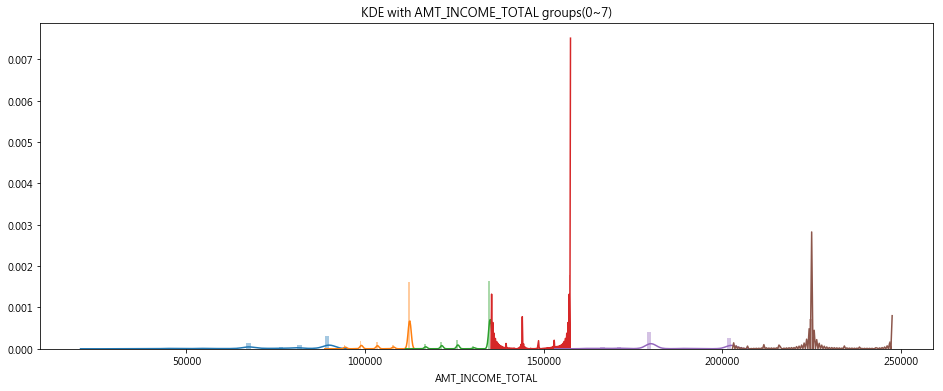

In [47]:
income_group_sorted = bin_series.sort_values(ascending=True)

plt.figure(figsize=(16,6))
for i in range(0, 6, 1):
#for i in range(len(income_group_sorted)):
    print("income_group_sorted[%d] = %s" % (i, income_group_sorted[i]))
    sns.distplot(app_train.loc[(app_train["AMT_INCOME_TOTAL_QCUT"] == income_group_sorted[i]), "AMT_INCOME_TOTAL"], 
                               label = str(income_group_sorted[i]))

plt.title('KDE with AMT_INCOME_TOTAL groups(0~7)')
plt.show()

## Outlier 差異非常大？

income_group_sorted[5] = (202500.0, 247500.0]
income_group_sorted[6] = (247500.0, 117000000.0]


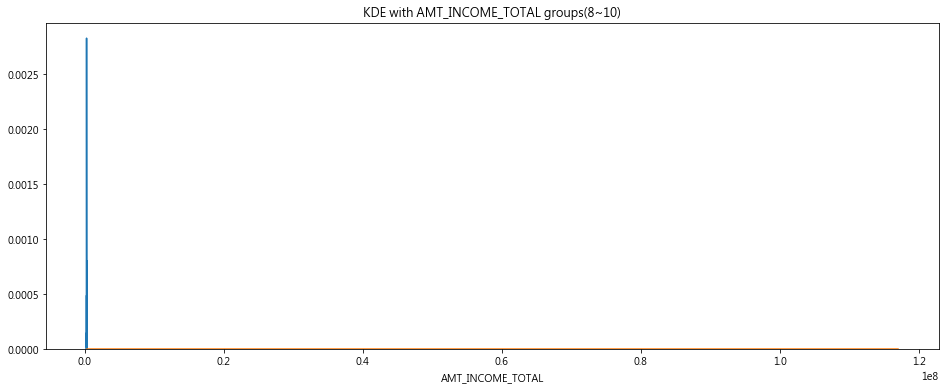

In [46]:
plt.figure(figsize=(16,6))
for i in range(5, 7, 1):
    print("income_group_sorted[%d] = %s" % (i, income_group_sorted[i]))
    sns.distplot(app_train.loc[(app_train["AMT_INCOME_TOTAL_QCUT"] == income_group_sorted[i]), "AMT_INCOME_TOTAL"], 
                               label = str(income_group_sorted[i]))

plt.title('KDE with AMT_INCOME_TOTAL groups(8~10)')
plt.show()